___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [12]:
df = pd.read_csv("Mall_Customers.csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.rename(columns={"CustomerID" : "customer_id", "Gender" : "gender", "Age" : "age", "Annual Income (k$)" : "annual_income",
                   "Spending Score (1-100)" : "spending_score"}, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [17]:
df.drop(columns="customer_id", inplace=True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [18]:
df.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

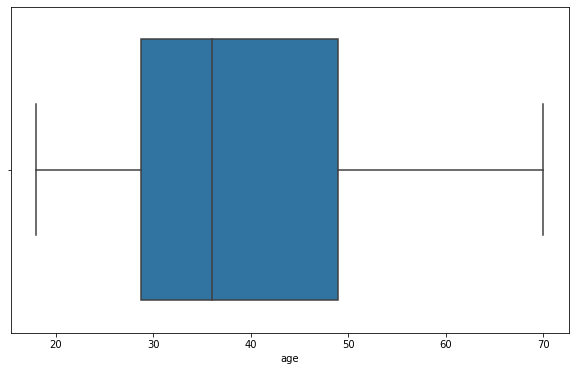

In [19]:
sns.boxplot(df.age);

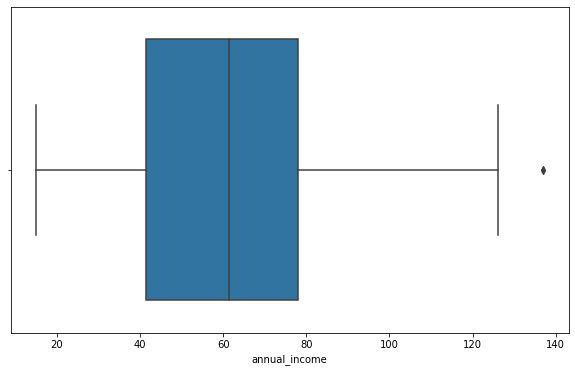

In [20]:
sns.boxplot(df.annual_income);

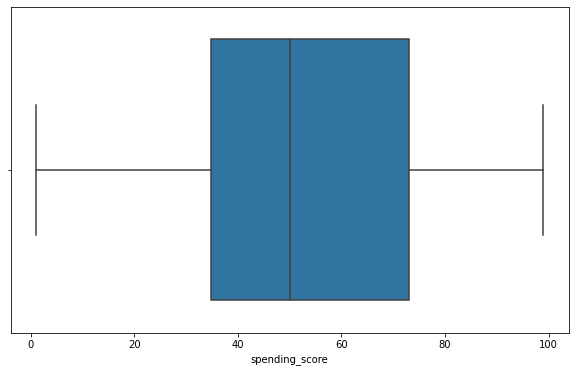

In [21]:
sns.boxplot(df.spending_score);

In [22]:
df[df["annual_income"]>135]

,gender,age,annual_income,spending_score
198,Male,32,137,18
199,Male,30,137,83


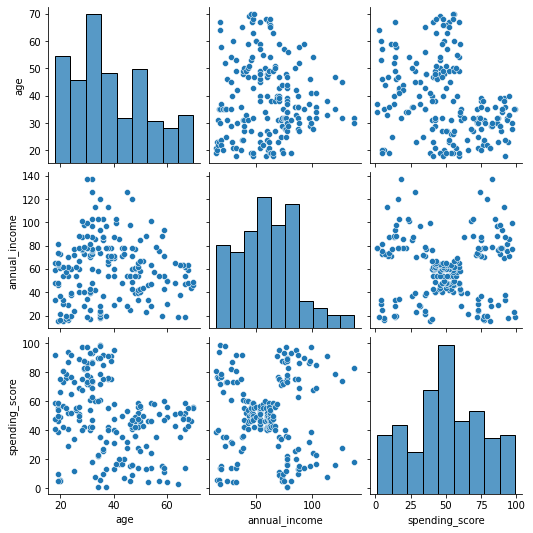

In [23]:
sns.pairplot(df);

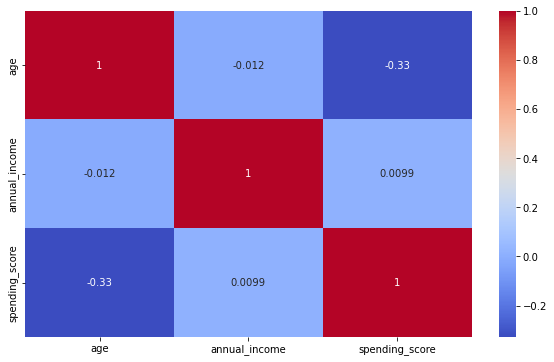

In [14]:
sns.heatmap(df.corr(), annot=True, cmap ="coolwarm");

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [15]:
X = df[["age", "spending_score"]]
X.sample(3)

,age,spending_score
120,27,56
198,32,18
154,47,16


### Scaling

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Hopkins Test

In [17]:
from sklearn.neighbors import BallTree

def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


In [18]:
hopkins(X, X.shape[0])

0.3275077559855709

## *ii. Determine optimal number of clusters*

### Elbow metod

In [19]:
from sklearn.cluster import KMeans

In [20]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

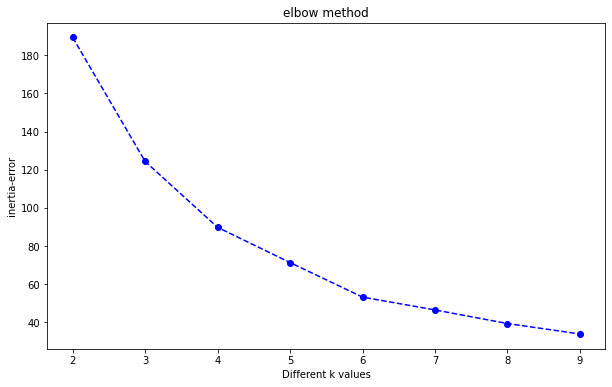

In [21]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

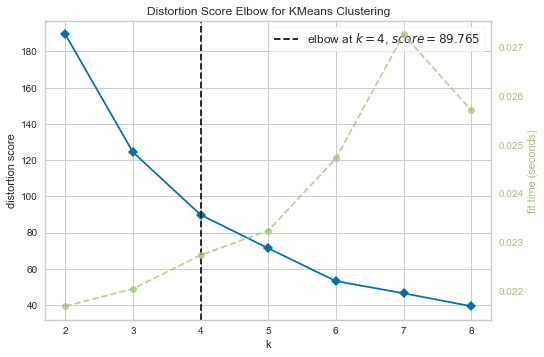

In [22]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof();



### Why silhouette_score is negative?

![image.png](attachment:image.png)

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
K_means_model = KMeans(n_clusters=6, random_state=42)

In [25]:
K_means_model.fit(X)

KMeans(n_clusters=6, random_state=42)

In [26]:
K_means_model.predict(X)

array([1, 5, 3, 5, 1, 5, 3, 5, 0, 5, 0, 5, 0, 5, 3, 5, 3, 1, 0, 5, 3, 5,
       0, 5, 0, 5, 2, 1, 3, 5, 0, 5, 0, 5, 0, 5, 3, 5, 3, 5, 4, 5, 2, 1,
       0, 1, 2, 1, 1, 1, 2, 1, 1, 4, 2, 2, 2, 4, 1, 2, 4, 1, 4, 2, 4, 1,
       2, 4, 1, 1, 4, 2, 4, 4, 4, 1, 2, 2, 1, 2, 4, 2, 4, 2, 1, 2, 2, 1,
       1, 2, 4, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 4, 1, 2, 1, 4, 2, 4, 4,
       4, 1, 2, 1, 1, 1, 4, 2, 2, 2, 1, 2, 2, 5, 3, 5, 2, 5, 0, 5, 0, 5,
       1, 5, 3, 5, 0, 5, 3, 5, 0, 5, 1, 5, 3, 5, 2, 5, 3, 5, 0, 5, 0, 5,
       0, 5, 3, 5, 3, 5, 2, 5, 3, 5, 0, 5, 3, 5, 3, 1, 3, 5, 3, 5, 0, 5,
       0, 5, 0, 5, 3, 5, 0, 5, 2, 5, 0, 5, 3, 5, 3, 5, 3, 5, 0, 5, 2, 5,
       3, 5], dtype=int32)

In [27]:
K_means_model.labels_

array([1, 5, 3, 5, 1, 5, 3, 5, 0, 5, 0, 5, 0, 5, 3, 5, 3, 1, 0, 5, 3, 5,
       0, 5, 0, 5, 2, 1, 3, 5, 0, 5, 0, 5, 0, 5, 3, 5, 3, 5, 4, 5, 2, 1,
       0, 1, 2, 1, 1, 1, 2, 1, 1, 4, 2, 2, 2, 4, 1, 2, 4, 1, 4, 2, 4, 1,
       2, 4, 1, 1, 4, 2, 4, 4, 4, 1, 2, 2, 1, 2, 4, 2, 4, 2, 1, 2, 2, 1,
       1, 2, 4, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 4, 1, 2, 1, 4, 2, 4, 4,
       4, 1, 2, 1, 1, 1, 4, 2, 2, 2, 1, 2, 2, 5, 3, 5, 2, 5, 0, 5, 0, 5,
       1, 5, 3, 5, 0, 5, 3, 5, 0, 5, 1, 5, 3, 5, 2, 5, 3, 5, 0, 5, 0, 5,
       0, 5, 3, 5, 3, 5, 2, 5, 3, 5, 0, 5, 3, 5, 3, 1, 3, 5, 3, 5, 0, 5,
       0, 5, 0, 5, 3, 5, 0, 5, 2, 5, 0, 5, 3, 5, 3, 5, 3, 5, 0, 5, 2, 5,
       3, 5], dtype=int32)

In [28]:
silhouette_score(X, K_means_model.labels_)

0.4531637132878646

In [29]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.47212716430695223
For n_clusters=3, the silhouette score is 0.4395299000230284
For n_clusters=4, the silhouette score is 0.4383860846564479
For n_clusters=5, the silhouette score is 0.4475485887887892
For n_clusters=6, the silhouette score is 0.4531637132878646
For n_clusters=7, the silhouette score is 0.4005396447043195
For n_clusters=8, the silhouette score is 0.4138741299279621


We decide for n=3

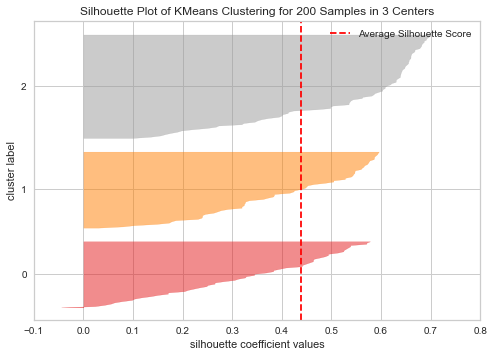

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)          # n_clusters=3'e karar verdik !
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    
visualizer.poof();

#### *iii. Apply K Means*

In [31]:
model = KMeans(n_clusters = 3, random_state=42)
model.fit_predict(X)

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [32]:
X1 = df[df["gender"] == "Female"][["annual_income", "spending_score"]]
X1.sample(3)

,annual_income,spending_score
46,40,55
50,42,52
147,77,74


In [33]:
X2 = df[df["gender"] == "Male"][["annual_income", "spending_score"]]
X2.sample(3)

,annual_income,spending_score
27,28,61
128,71,11
131,71,75


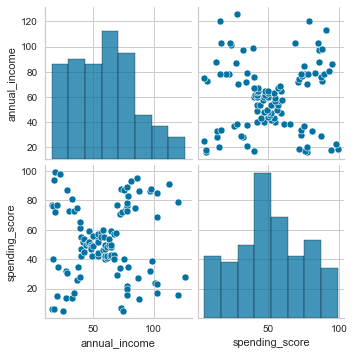

In [34]:
sns.pairplot(X1);

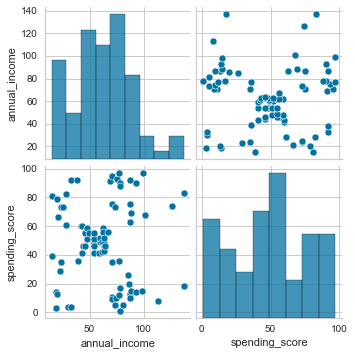

In [35]:
sns.pairplot(X2);

### Scaling

In [36]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)

### Hopkins 

In [37]:
hopkins(X1, X1.shape[0])

0.3831842224103774

In [38]:
hopkins(X2, X2.shape[0])

0.3213555463457861

#### *ii. Determine optimal number of clusters*

In [39]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)

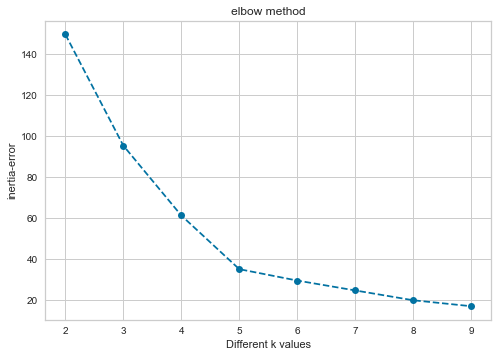

In [40]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

In [41]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X2)
    ssd.append(model.inertia_)

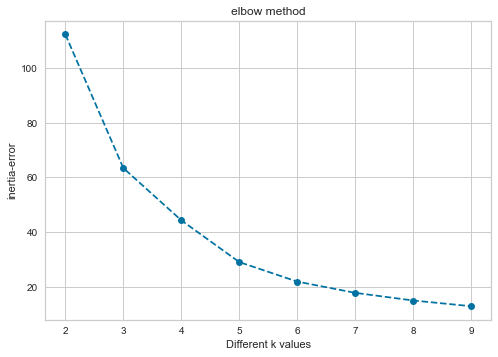

In [42]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

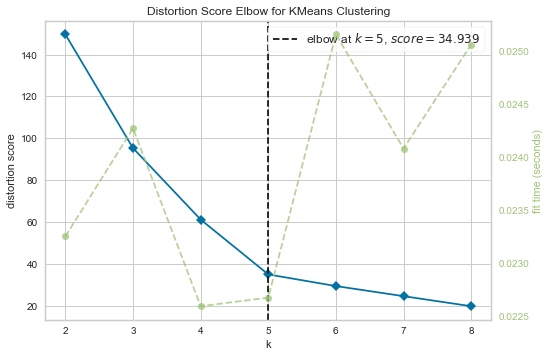

In [43]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X1)        # Fit the data to the visualizer
visualizer.poof();




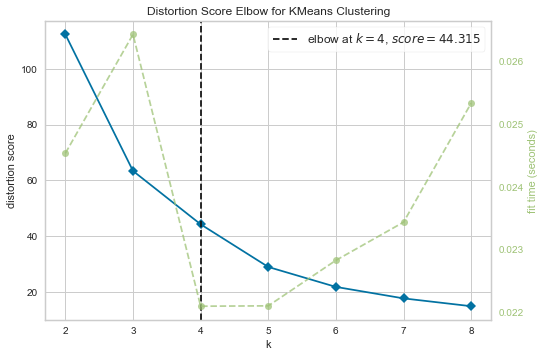

In [44]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.poof();




In [45]:
K_means_model = KMeans(n_clusters=5, random_state=42)

In [46]:
K_means_model.fit(X1)

KMeans(n_clusters=5, random_state=42)

In [47]:
K_means_model.predict(X1)

array([3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2,
       3, 2, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 4, 0,
       4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 4, 4, 0,
       4, 0], dtype=int32)

In [48]:
silhouette_score(X1, K_means_model.labels_)

0.544937150061101

In [49]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968238129395705
For n_clusters=3, the silhouette score is 0.4416828014198379
For n_clusters=4, the silhouette score is 0.49156738771145736
For n_clusters=5, the silhouette score is 0.544937150061101
For n_clusters=6, the silhouette score is 0.528837275302729
For n_clusters=7, the silhouette score is 0.5145724765166632
For n_clusters=8, the silhouette score is 0.44903589386189574


In [50]:
K_means_model = KMeans(n_clusters=5, random_state=42)

In [51]:
K_means_model.fit_predict(X2)

array([4, 3, 4, 4, 4, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1],
      dtype=int32)

In [52]:
silhouette_score(X2, K_means_model.labels_)

0.566431413628382

In [53]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4139831757017104
For n_clusters=3, the silhouette score is 0.4884731696758509
For n_clusters=4, the silhouette score is 0.520584892265658
For n_clusters=5, the silhouette score is 0.566431413628382
For n_clusters=6, the silhouette score is 0.5780398306945436
For n_clusters=7, the silhouette score is 0.5802358998640909
For n_clusters=8, the silhouette score is 0.488769538756391


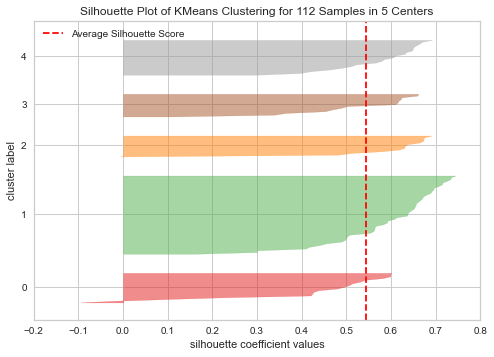

In [54]:
from yellowbrick.cluster import SilhouetteVisualizer

model4 = KMeans(n_clusters=5, random_state=42)          # n_clusters=5'e karar verdik !
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X1)    
visualizer.poof();

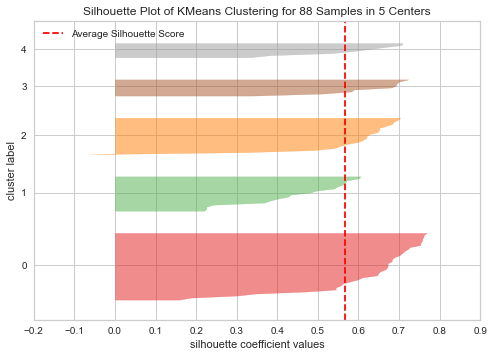

In [55]:
from yellowbrick.cluster import SilhouetteVisualizer

model5 = KMeans(n_clusters=5, random_state=42)          # n_clusters=5'e karar verdik !
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X2)    
visualizer.poof();

#### *iii. Apply K Means*

In [56]:
model1 = KMeans(n_clusters = 5, random_state=42)
model1.fit_predict(X1)

array([3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2,
       3, 2, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 4, 0,
       4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 4, 4, 0,
       4, 0], dtype=int32)

In [57]:
model2 = KMeans(n_clusters = 5, random_state=42)
model2.fit_predict(X2)

array([4, 3, 4, 4, 4, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1],
      dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [58]:
clusters1 = model1.labels_

In [59]:
X1 = pd.DataFrame(X1, columns=["Annual Income", "Spending Score"])

In [60]:
X1["predicted_clusters"] = clusters1

In [61]:
X1.head()

,Annual Income,Spending Score,predicted_clusters
0,-1.670170,-1.896392,3
1,-1.670170,1.061072,2
2,-1.631553,-0.480142,3
3,-1.631553,1.019418,2
4,-1.592937,-1.896392,3


In [62]:
clusters2 = model2.labels_

In [63]:
X2 = pd.DataFrame(X2, columns=["Annual Income", "Spending Score"])

In [64]:
X2["predicted_clusters"] = clusters2
X2.head()

,Annual Income,Spending Score,predicted_clusters
0,-1.783064,-0.342902,4
1,-1.783064,1.171276,3
2,-1.632044,-1.640770,4
3,-1.632044,-1.244199,4
4,-1.594289,-1.280251,4


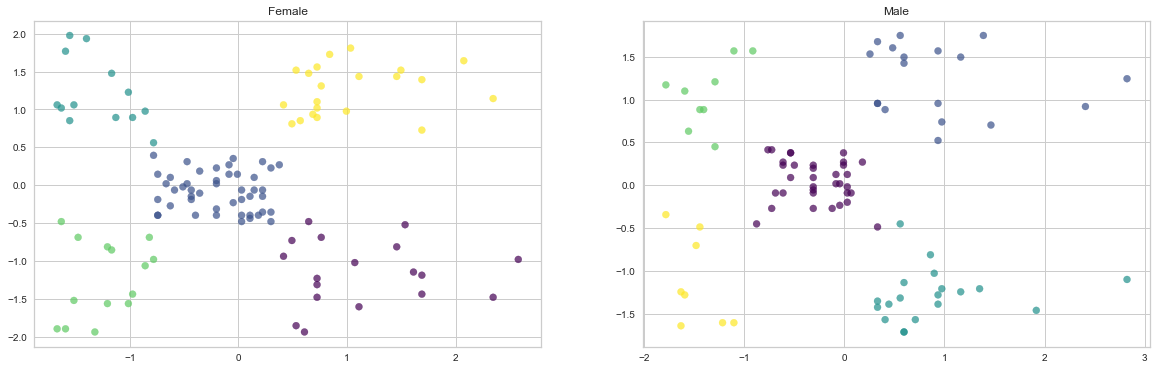

In [65]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X1["Annual Income"], X1["Spending Score"], c = X1.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.title("Female")                              # c : renklendirme parametresi

plt.subplot(122)
plt.scatter(X2["Annual Income"], X2["Spending Score"], c = X2.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.title("Male");

In [66]:
centers1 = model1.cluster_centers_
centers1

array([[ 1.15099068, -1.15818314],
       [-0.1817501 , -0.08351907],
       [-1.29588563,  1.20846472],
       [-1.23159527, -1.24182259],
       [ 1.03483425,  1.25545945]])

In [67]:
centers2 = model2.cluster_centers_
centers2

array([[-0.28285935,  0.04836638],
       [ 0.93948832,  1.23136254],
       [ 0.89356415, -1.28214853],
       [-1.37614921,  1.05110319],
       [-1.48574347, -1.11351116]])

In [68]:
centers1[:,0]

array([ 1.15099068, -0.1817501 , -1.29588563, -1.23159527,  1.03483425])

In [69]:
centers1[:,1]

array([-1.15818314, -0.08351907,  1.20846472, -1.24182259,  1.25545945])

In [70]:
centers2[:,0]

array([-0.28285935,  0.93948832,  0.89356415, -1.37614921, -1.48574347])

In [71]:
centers2[:,1]

array([ 0.04836638,  1.23136254, -1.28214853,  1.05110319, -1.11351116])

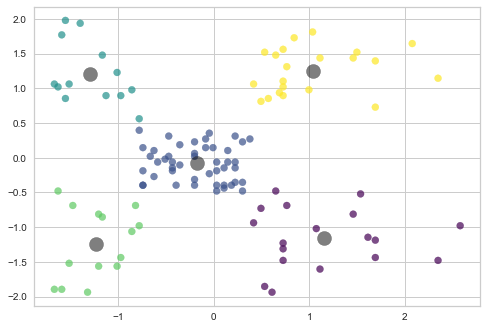

In [72]:
plt.scatter(X1["Annual Income"], X1["Spending Score"], c = X1.predicted_clusters, cmap = "viridis", alpha=0.7)  # X.predicted_clusters
plt.scatter(centers1[:, 0], centers1[:, 1], c='black', s=200, alpha=0.5)

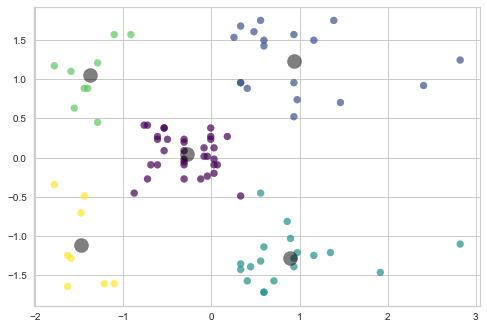

In [73]:
plt.scatter(X2["Annual Income"], X2["Spending Score"], c = X2.predicted_clusters, cmap = "viridis", alpha=0.7)  # X.predicted_clusters
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5)

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
X.head()

NameError: name 'X' is not defined

In [75]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

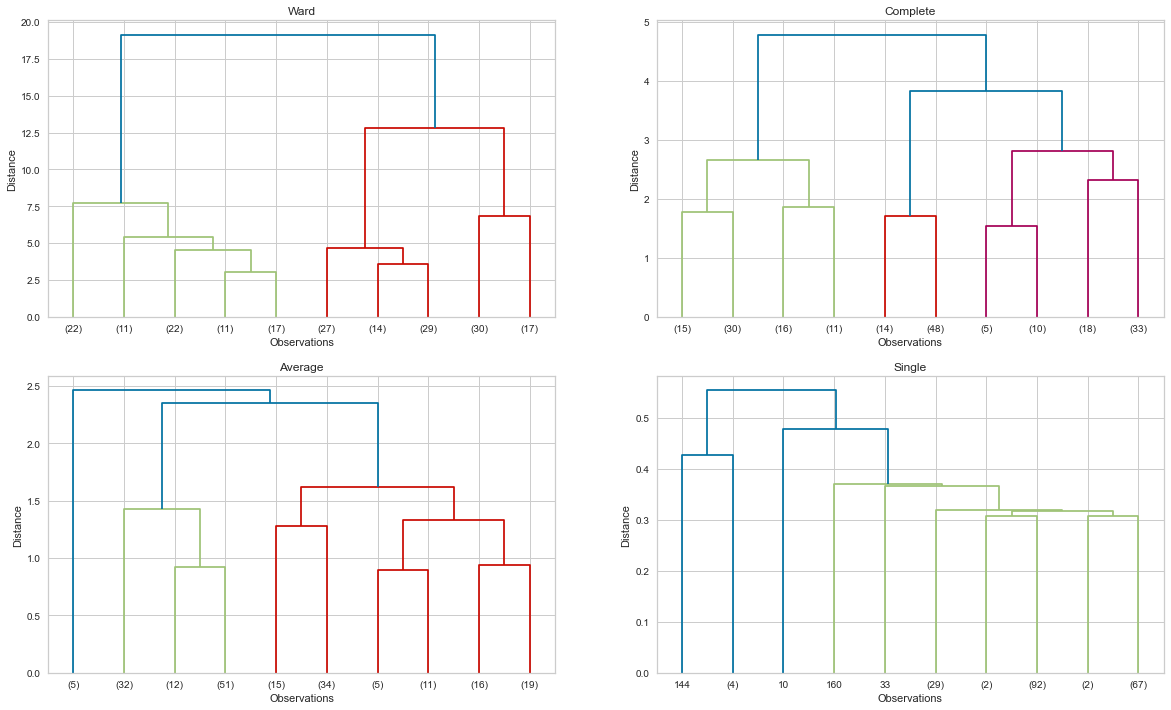

In [76]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

## Clustering based on Annual Income and Spending Score- x2

In [77]:
hc_ward1 = linkage(y = X1, method = "ward")
hc_ward2 = linkage(y = X2, method = "ward")

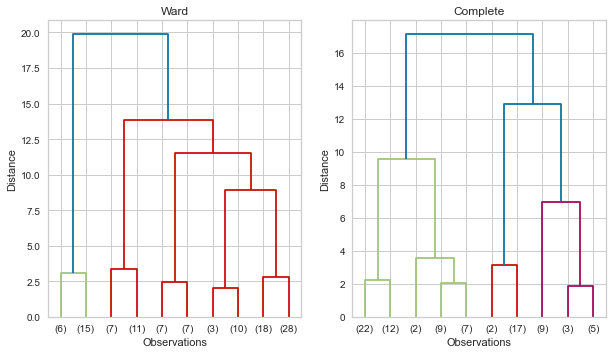

In [78]:
plt.figure(figsize = (10,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward1, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward2, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [79]:
from sklearn.cluster import AgglomerativeClustering

In [80]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.41449964268829986
Silhouette Score for 3 clusters: 0.4166414852049989
Silhouette Score for 4 clusters: 0.38927004893647266
Silhouette Score for 5 clusters: 0.3764554127969014
Silhouette Score for 6 clusters: 0.3990690566558255
Silhouette Score for 7 clusters: 0.358604678369238
Silhouette Score for 8 clusters: 0.361081283331325
Silhouette Score for 9 clusters: 0.3659083749836485


We decide to use 3 clusters

In [81]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model.fit_predict(X)

array([1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2])

#### Annual Income and Spending Score- x2

In [82]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.5387467323444027
Silhouette Score for 3 clusters: 0.5035610555589182
Silhouette Score for 4 clusters: 0.6035123585079463
Silhouette Score for 5 clusters: 0.673096139001797
Silhouette Score for 6 clusters: 0.6527960563757124
Silhouette Score for 7 clusters: 0.6102021811350701
Silhouette Score for 8 clusters: 0.48863930557614893
Silhouette Score for 9 clusters: 0.46737845747311324


In [83]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.4835194409596749
Silhouette Score for 3 clusters: 0.5724187994829506
Silhouette Score for 4 clusters: 0.6506600013489577
Silhouette Score for 5 clusters: 0.6948051550364313
Silhouette Score for 6 clusters: 0.6943748476672551
Silhouette Score for 7 clusters: 0.6805136223457701
Silhouette Score for 8 clusters: 0.5603233546937582
Silhouette Score for 9 clusters: 0.5262150733435411


We decide for 5 clusters.

In [84]:
model1 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X1)

array([3, 4, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 4, 3, 4,
       3, 4, 3, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0])

In [85]:
model2 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
model2.fit_predict(X2)

array([3, 4, 3, 3, 3, 4, 4, 3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0])

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [88]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model.fit_predict(X)
clusters = model.labels_

In [89]:
X = pd.DataFrame(X, columns=["Age", "Spending Score"])
X["predicted_clusters"] = clusters

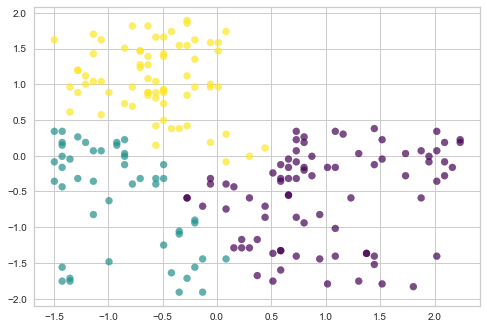

In [90]:
plt.scatter(X["Age"], X["Spending Score"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)  # X.predicted_clusters

<Figure size 864x432 with 0 Axes>

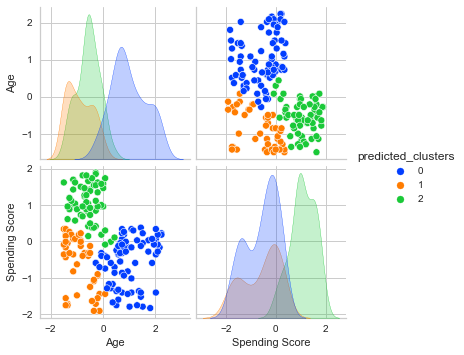

In [91]:
plt.figure(figsize = (12,6))
sns.pairplot(X, hue= "predicted_clusters", palette="bright");

#### Annual Income and Spending Score- x2

In [92]:
clusters1 = model1.labels_
clusters2 = model2.labels_

''

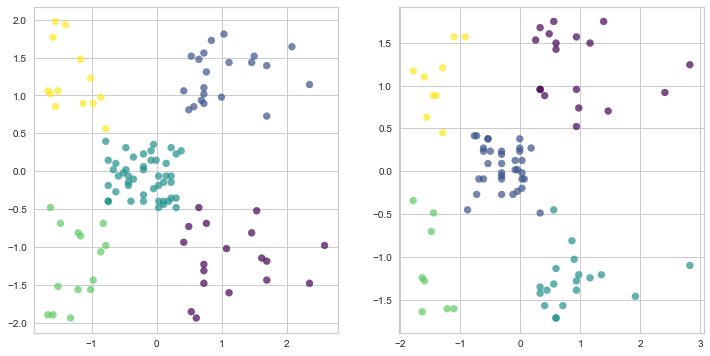

In [93]:
X1 = pd.DataFrame(X1, columns=["Annual Income", "Spending Score"])
X1["predicted_clusters"] = clusters1

X2 = pd.DataFrame(X2, columns=["Annual Income", "Spending Score"])
X2["predicted_clusters"] = clusters2

plt.figure(figsize = (12,6))
plt.subplot(121)
plt.scatter(X1["Annual Income"], X1["Spending Score"], c = X1.predicted_clusters, cmap = "viridis", alpha=0.7)  # X.predicted_clusters


plt.subplot(122)
plt.scatter(X2["Annual Income"], X2["Spending Score"], c = X2.predicted_clusters, cmap = "viridis", alpha=0.7)  # X.predicted_clusters
;

<Figure size 864x432 with 0 Axes>

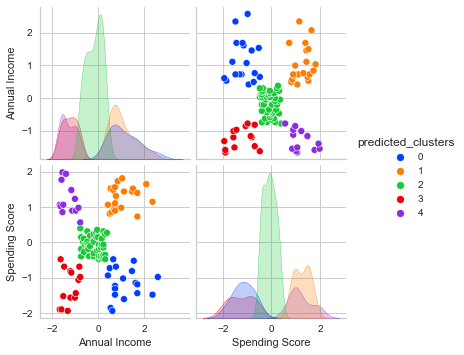

In [94]:
plt.figure(figsize = (12,6))
sns.pairplot(X1, hue= "predicted_clusters", palette="bright");

<Figure size 864x432 with 0 Axes>

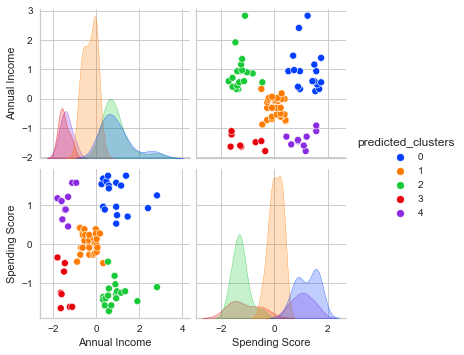

In [95]:
plt.figure(figsize = (12,6))
sns.pairplot(X2, hue= "predicted_clusters", palette="bright");

#### Interpretation based on Age and Spending Score- x1

In [96]:
clusters

array([1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2])

In [105]:
df_female = df[df["gender"] == "Female"][["age", "annual_income", "spending_score"]]
df_male = df[df["gender"] == "Male"][["age", "annual_income", "spending_score"]]

In [99]:
df["clusters"] = clusters

In [106]:
df_female["clusters"] = clusters1
df_male["clusters"] = clusters2

In [107]:
df_male.head()

,age,annual_income,spending_score,clusters
0,19,15,39,3
1,21,15,81,4
8,64,19,3,3
10,67,19,14,3
14,37,20,13,3


<Figure size 864x432 with 0 Axes>

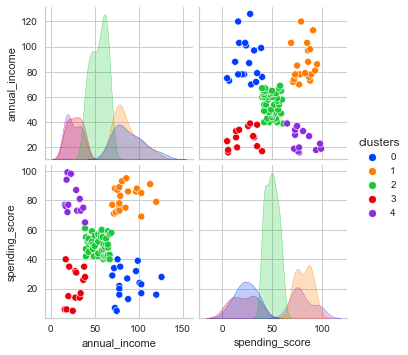

In [110]:
plt.figure(figsize = (12,6))
sns.pairplot(df_female.drop(columns="age"), hue= "clusters", palette="bright");

<Figure size 864x432 with 0 Axes>

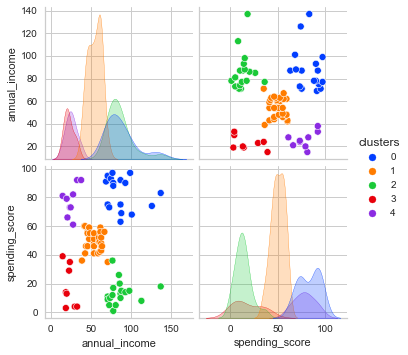

In [111]:
plt.figure(figsize = (12,6))
sns.pairplot(df_male.drop(columns="age"), hue= "clusters", palette="bright");

In [114]:
df_female.groupby("clusters")[["age", "annual_income", "spending_score"]].mean()

,age,annual_income,spending_score
clusters,,,
0,41.388889,89.055556,23.722222
1,32.190476,86.047619,81.666667
2,41.521739,54.543478,49.521739
3,43.214286,27.357143,21.714286
4,25.461538,25.692308,80.538462


### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___